In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets,metrics,naive_bayes,tree,svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score,cross_validate


from matplotlib import pyplot as plt

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.plotting.backend = "plotly"


import idx2numpy

# Data

From http://yann.lecun.com/exdb/mnist/. 

Simplest to download the data to a local directory and unzip the files.

70 k images of handwritten digits, split into a training set of 60 k and a test set with 10 k. Each image is a 28 x 28 array of pixels. Classification task is to recognize the digits.

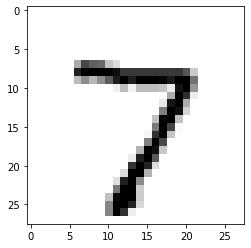

In [35]:
# Reading training data from unzipped mnist files
files = { 'X_train': 'train-images-idx3-ubyte',
         'y_train': 'train-labels-idx1-ubyte',
         'X_test': 't10k-images-idx3-ubyte',
         'y_test': 't10k-labels-idx1-ubyte'    
}

DA = {}
for k,v in files.items():
    DA[k] = idx2numpy.convert_from_file('data/'+v)        # files are in a local directory called data/
    if k[0:1]=='X':
        DA[k] = DA[k].reshape((-1,28*28))                         # re-shaping X values to work with sklearn
        
plt.imshow(DA['X_test'][0].reshape((28,28)),cmap=plt.cm.binary)      # back to 28 x 28 array for display only

In [36]:
# Random sampling of test images

# n_test = DA['y_test'].shape[0]
# sample = np.random.choice(n_test,size = 10)
# sample
# DA['X_test'][sample]

In [ ]:
knn = KNeighborsClassifier()     

_=knn.fit(DA['X_train'],DA['y_train'])                   # Train the classifier on all training data

yhat = knn.predict(DA['X_test'])
metrics.confusion_matrix(DA['y_test'],yhat)

In [25]:
X = DA['X_test'].reshape((-1,28*28))
X.shape

(10000, 784)

In [33]:
[k for k in DA.keys() ]

['X_train', 'X_test']

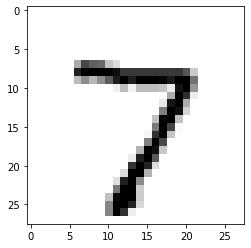

In [30]:
plt.imshow(X[0].reshape((28,28)),cmap=plt.cm.binary)